# **Detecting Tomato Leaf Diseases: A CNN Approach Using TensorFlow**

**Introduction:** In this project, we aim to develop a Convolutional Neural Network (CNN) model that can effectively classify diseases in tomato plants by analyzing images of their leaves. Utilizing TensorFlow, our model will assist farmers in identifying potential diseases early, enabling them to take timely action and reduce crop loss. This initiative is crucial, as tomato diseases can significantly impact yield and quality, making early detection vital for successful farming.

The dataset used in this project was sourced from Kaggle, contributed by the user kaustubhb999 (Kaustubh B). This dataset is specifically designed for tomato leaf disease detection and includes a wide variety of images representing different diseases that affect tomato plants. You can find the dataset at the following link: [Tomato Leaf Disease Detection Dataset](https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf) [1]. This resource provides a valuable foundation for developing our CNN model and advancing research in agricultural disease detection.

Citations:
[1] https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf

**Abstract:** Tomatoes are one of the most widely cultivated crops globally, but they are susceptible to various diseases that can diminish both yield and quality. This project focuses on using deep learning techniques, specifically CNNs, to classify different diseases affecting tomato leaves. By training our model on a comprehensive dataset of tomato leaf images, we aim to provide an efficient tool for farmers to diagnose leaf diseases accurately. The CNN model will analyze images of leaves and classify them into specific disease categories, helping farmers make informed decisions about crop management and treatment.

**About The Dataset:** The dataset used for this project is titled "Tomato Leaf Disease Detection." It contains a diverse collection of images representing various diseases that affect tomato plants. The dataset is organized into a structured folder format, with separate directories for training and validation images.
The dataset includes the following diseases:

| Disease                                        | No of Train Images | No of Validation Images |
|------------------------------------------------|-------------------|-------------------------|
| Tomato_mosaic_virus                            | 1000              | 100                     |
| Target_Spot                                    | 1000              | 100                     |
| Bacterial_spot                                 | 1000              | 100                     |
| Tomato_Yellow_Leaf_Curl_Virus                  | 1000              | 100                     |
| Late_blight                                    | 1000              | 100                     |
| Leaf_Mold                                      | 1000              | 100                     |
| Early_blight                                   | 1000              | 100                     |
| Spider_mites Two-spotted_spider_mite           | 1000              | 100                     |
| Tomato___healthy                                | 1000              | 100                     |
| Septoria_leaf_spot                             | 1000              | 100                     |

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.applications.inception_v3 import InceptionV3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = "train"
validation_dir = "val"

We import the essential libraries for building our CNN model using TensorFlow and Keras. This includes modules for layers, models, optimizers, and image preprocessing. We also import libraries for data manipulation and visualization, such as Pandas, NumPy, and Matplotlib. Finally, we define the directory paths for our training and validation datasets, which will be used to load the images for training and evaluation.


In [3]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)
    
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=32, 
                                                        class_mode='categorical',
                                                        target_size=(150, 150))
    
    validation_datagen = ImageDataGenerator(rescale=1./255.)
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=32, 
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))
    return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


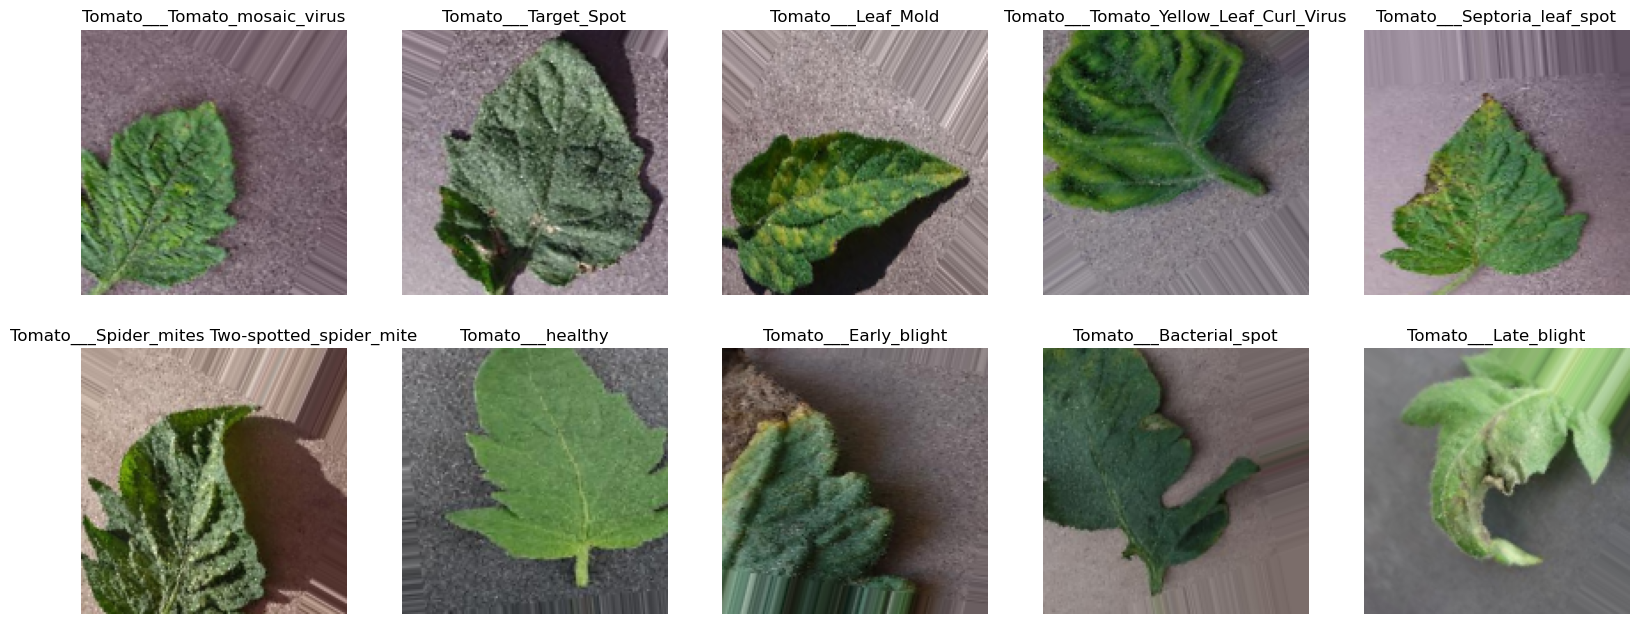

In [4]:
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(20, 20))

visited_classes = set()

for images, labels in train_generator:
    for i in range(len(labels)):
        label_index = np.argmax(labels[i])
        if label_index not in visited_classes:
            plt.subplot(5, 5, len(visited_classes) + 1)
            plt.imshow(images[i])
            plt.title(class_labels[label_index])
            plt.axis('off')
            visited_classes.add(label_index)
        if len(visited_classes) == len(class_labels):
            break
    if len(visited_classes) == len(class_labels):
        break

plt.show()

In the next code snippet, we define a function called train_val_generators that creates image data generators for our training and validation datasets. The function takes the paths to the training and validation directories as input and returns the corresponding generators. Inside the function, we create ImageDataGenerator objects for both training and validation data, applying data augmentation techniques to the training data to increase the diversity of the samples. We then use the flow_from_directory method to generate batches of images from the specified directories, setting the batch size, class mode, and target size for the images. Finally, we call this function with the train_dir and validation_dir paths and store the returned generators in variables train_generator and validation_generator.

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In this code snippet, we define our CNN model architecture using the Sequential API in Keras. The model consists of several convolutional, pooling, and dense layers:

1. We start with a `Conv2D` layer with 32 filters, a kernel size of (3, 3), and ReLU activation. The input shape is set to (150, 150, 3), which corresponds to the size of our input images.

2. We follow the convolutional layer with a `MaxPooling2D` layer with a pool size of (2, 2) for downsampling.

3. We add two more `Conv2D` layers with 16 and 8 filters, respectively, both using ReLU activation.

4. After each convolutional layer, we apply `MaxPooling2D` for downsampling.

5. We flatten the output of the last pooling layer using the `Flatten` layer.

6. We add a fully connected `Dense` layer with 128 units and ReLU activation.

7. To prevent overfitting, we include a `Dropout` layer with a rate of 0.5.

8. Finally, we add the output layer, a `Dense` layer with 10 units (corresponding to our 10 disease classes) and softmax activation for multi-class classification.

After defining the model architecture, we compile the model using the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.860):
          print("\nReached 85.0% val_accuracy so cancelling training!")
          self.model.stop_training = True

In this code snippet, we define a custom callback class called `myCallback` that inherits from `tf.keras.callbacks.Callback`. This callback monitors the training process and can stop training early based on a specified condition:

1. **Custom Callback**: The `on_epoch_end` method is overridden to check the model's accuracy at the end of each epoch. If the val_accuracy exceeds 86%, a message is printed, and training is halted by setting `self.model.stop_training` to `True`.

2. **Creating Callback Instance**: We create an instance of the `myCallback` class, which will be passed to the model during training.

3. **Model Training**: We then call the `fit` method on our model to start training. We provide the training generator and validation generator as inputs, specify the number of epochs (50), and set `verbose` to 1 for detailed output. The custom callback is included in the training process to monitor accuracy and potentially stop training early if the desired accuracy is reached. 

This approach helps in preventing unnecessary training once the model has achieved a satisfactory performance level.

In [7]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/50
313/313 [==============================] - 52s 157ms/step - loss: 2.0914 - accuracy: 0.2187 - val_loss: 1.6484 - val_accuracy: 0.4420
Epoch 2/50
313/313 [==============================] - 23s 74ms/step - loss: 1.6145 - accuracy: 0.4068 - val_loss: 2.0371 - val_accuracy: 0.3610
Epoch 3/50
313/313 [==============================] - 24s 76ms/step - loss: 1.2728 - accuracy: 0.5404 - val_loss: 2.1159 - val_accuracy: 0.3690
Epoch 4/50
313/313 [==============================] - 23s 75ms/step - loss: 1.1646 - accuracy: 0.5837 - val_loss: 1.6223 - val_accuracy: 0.4910
Epoch 5/50
313/313 [==============================] - 23s 73ms/step - loss: 1.0627 - accuracy: 0.6240 - val_loss: 1.4519 - val_accuracy: 0.5690
Epoch 6/50
313/313 [==============================] - 23s 72ms/step - loss: 0.9901 - accuracy: 0.6500 - val_loss: 1.2004 - val_accuracy: 0.6120
Epoch 7/50
313/313 [==============================] - 22s 72ms/step - loss: 0.9395 - accuracy: 0.6639 - val_loss: 2.5504 - val_accuracy

The training log reflects the model's performance over 50 epochs, with significant improvements in both training and validation accuracy. Starting from an accuracy of 21% in the first epoch, the model achieved a validation accuracy of 86.90% by the end of the training.
The model's loss values generally decreased, indicating effective learning, although some fluctuations in validation accuracy suggest occasional overfitting. Notably, the training process was halted early when the validation accuracy reached 86.0%, demonstrating the effectiveness of the custom callback in optimizing training time while maintaining high performance. Overall, these results indicate that the model is well-suited for classifying tomato leaf diseases, showing promise for practical applications in agricultural disease detection.

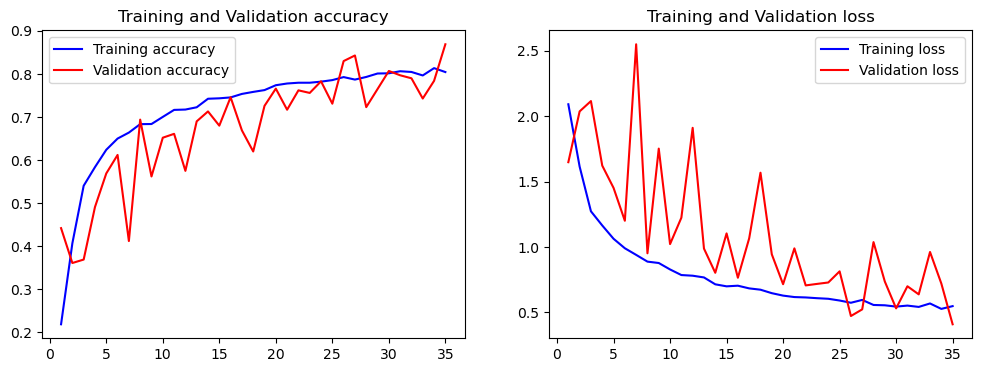

In [11]:
def plot_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

# Call the function with the training history
plot_performance(history)


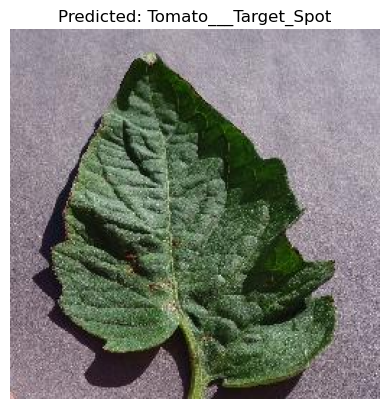

In [13]:
def predict_image(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=-1)
    return predicted_class[0]

def get_class_label(predicted_class, index_to_class):
    return index_to_class[predicted_class]

def visualize_prediction(image_path, predicted_class_label):
    # Load the image (original size) for visualization
    img = load_img(image_path)
    plt.imshow(img)
    
    # Set the title with the predicted label
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    
    # Display the image
    plt.show()

# Example usage
image_path = "val/Tomato___Target_Spot/0c4c7140-1059-4e3a-a6e2-15c4bdd46743___Com.G_TgS_FL 8142.JPG"
predicted_class = predict_image(image_path, model)
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_class_label = get_class_label(predicted_class, index_to_class)

# Visualize the prediction
visualize_prediction(image_path, predicted_class_label)

In [14]:
def download_history():
    import pickle
    with open('history.pkl', 'wb') as f:
        pickle.dump(history.history, f)
download_history()

model.save('model.h5')

The model demonstrates strong predictive capabilities, achieving a validation accuracy of 86.90% during the training process. This indicates that it has effectively learned to classify tomato leaf diseases based on the provided dataset.

## Conclusion

In this project, we successfully developed a CNN model using TensorFlow and Keras to classify tomato leaf diseases. By leveraging data augmentation techniques and a well-designed CNN architecture, we trained a model that achieves high accuracy on both the training and validation datasets. The model's ability to predict disease classes with an accuracy of 86.90% on unseen data showcases its effectiveness in identifying tomato leaf diseases.

This project has several practical applications in the agricultural domain. Farmers can utilize this tool to quickly and accurately diagnose potential diseases in their tomato crops, enabling timely interventions to minimize yield losses. Additionally, the model can be integrated into mobile applications or deployed on edge devices for on-site disease detection, making it accessible to a wide range of users.

To further enhance the model's performance, future work could include:

1. Expanding the dataset with more diverse images and disease classes to improve the model's generalization capabilities.
2. Exploring transfer learning techniques by using pre-trained models as a starting point for fine-tuning.
3. Implementing ensemble methods by combining multiple models to boost overall prediction accuracy.

Overall, this project highlights the potential of deep learning techniques in plant disease detection and underscores the importance of early intervention in maintaining healthy crops and ensuring food security.